# Importing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cars=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


<function matplotlib.pyplot.show(close=None, block=None)>

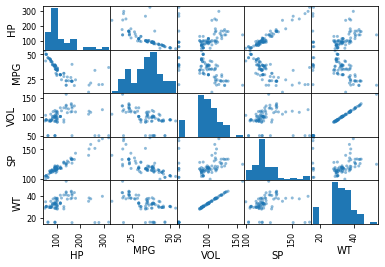

In [6]:
pd.plotting.scatter_matrix(cars)
plt.show

# Preparing a model

In [8]:
from statsmodels.formula.api import ols

# SLR Models

In [9]:
model=ols('MPG~VOL',data=cars).fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.82e-07
Time:                        12:08:42   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X,Y=cars['MPG'],cars['VOL']

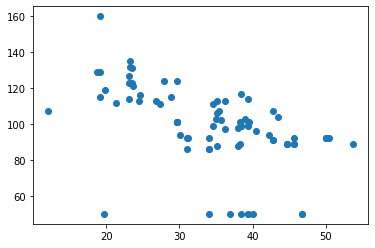

In [14]:
plt.scatter(X,Y)
plt.show()

In [16]:
model=ols('WT~VOL',data=cars).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WT   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.951e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.77e-112
Time:                        16:33:27   Log-Likelihood:                -16.659
No. Observations:                  81   AIC:                             37.32
Df Residuals:                      79   BIC:                             42.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7440      0.153     -4.871      0.000      -1.048      -0.440
VOL            0.3357      0.002    222.501      0.000       0.333       0.339
==============================================================================
Omnibus:                       25.999   Durbin-Watson:                   2.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.169
Skew:                          -0.127   Prob(JB):                       0.0754
Kurtosis:                       1.789   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X,Y=cars['WT'],cars['VOL']

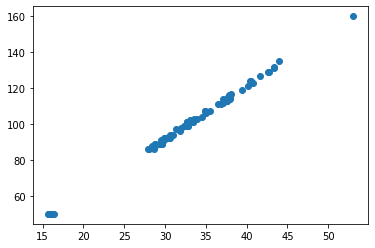

In [12]:
plt.scatter(X,Y)
plt.show()

# Correlation matrix

In [13]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Calculating VIF

<img src='https://miro.medium.com/freeze/max/385/1*lPyHIl8GlYoyfAd7ntAnnw.gif'>

In [22]:
m_vol=ols('VOL~SP+HP+WT',data=cars).fit()
1/(1-m_vol.rsquared)

638.8060836592878

In [23]:
m_vol_1=ols('SP~VOL+HP+WT',data=cars).fit()
1/(1-m_vol_1.rsquared)

20.00763878305008

In [24]:
m_vol_2=ols('WT~VOL+HP+SP',data=cars).fit()
1/(1-m_vol_2.rsquared)

639.5338175572624

In [25]:
m_vol_3=ols('HP~VOL+SP+WT',data=cars).fit()
1/(1-m_vol_3.rsquared)

19.92658897499852

In [14]:
# why we dont use mpg


# Subset Selection

<img src='https://www.gstatic.com/education/formulas2/472522532/en/akaike_information_criterion.svg'>

In [26]:
VOL=ols('MPG~VOL+SP+HP',data=cars).fit()

In [27]:
f'AIC:{VOL.aic},R2:{VOL.rsquared}'

'AIC:475.9875158854609,R2:0.7703683413213022'

In [29]:
WT=ols('MPG~WT+SP+HP',data=cars).fit()

In [31]:
f'AIC:{WT.aic},R2:{WT.rsquared}'

'AIC:476.29927501529767,R2:0.769482813998346'

# Residual Analysis

## Test For Normality QQ-Plot

In [15]:
import statsmodels.api as sm

Text(0.5, 1.0, 'residual Plot')

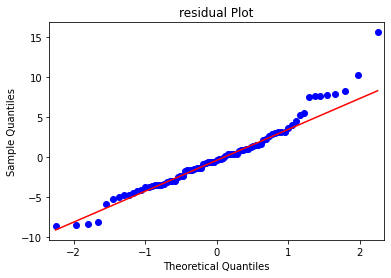

In [16]:
model=ols('MPG~HP+SP+WT+VOL',data=cars).fit()
sm.qqplot(model.resid,line='q')
plt.title("residual Plot")

## Residual Plot for Homoscedasticity

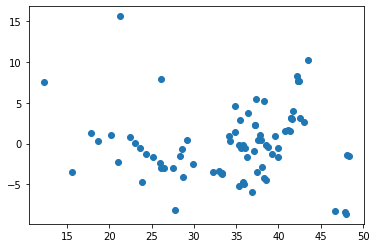

In [17]:
plt.scatter(model.fittedvalues,model.resid)
plt.show()

## Residual Vs Regressors

# Model Deletion Diagnostics


## Detecting Influencers/Outliers

## Cook’s Distance

In [18]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [47]:
c

array([1.36180622e-02, 1.01712728e-02, 3.37889250e-04, 2.07238645e-02,
       5.57706731e-03, 1.74852785e-02, 2.81143077e-03, 5.11618297e-03,
       5.69055126e-02, 3.31775980e-04, 3.02775098e-03, 3.46738019e-02,
       1.14677573e-02, 3.45343958e-03, 3.58146853e-03, 1.31125918e-02,
       7.33934001e-03, 5.32969638e-03, 6.03945493e-04, 1.22150918e-02,
       4.50817820e-03, 5.27689439e-03, 3.13134121e-02, 6.08561716e-03,
       1.41837442e-02, 7.49483886e-05, 5.10730267e-02, 7.72017228e-03,
       4.63778052e-02, 9.23736085e-03, 1.77971537e-02, 3.92582041e-04,
       1.22886099e-02, 1.05222428e-02, 1.20907304e-02, 2.66079087e-03,
       6.38374081e-05, 2.99193553e-03, 1.30174337e-02, 7.35965259e-04,
       2.35609159e-03, 1.69292802e-03, 5.98513421e-03, 1.12987946e-02,
       8.02654292e-03, 6.46641840e-04, 7.65861640e-05, 2.50022641e-04,
       1.25104438e-03, 6.67778452e-03, 4.43447769e-04, 5.82079226e-03,
       2.02117891e-02, 3.55583893e-02, 2.20040166e-05, 9.10678241e-03,
      

In [48]:
c.argmax()

76

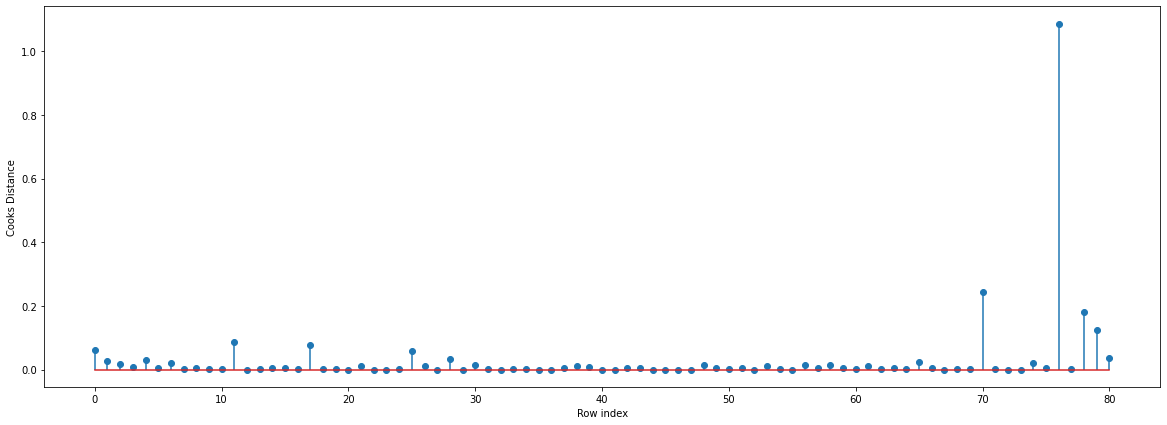

In [19]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## High Influence points

In [21]:
k = cars.shape[1]
k

5

In [22]:
n = cars.shape[0]
n

81

In [23]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

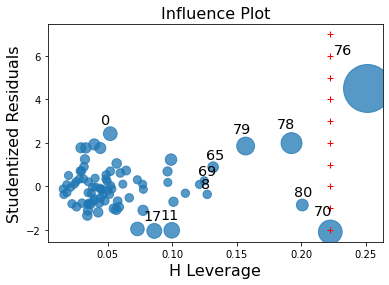

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

# Improving the model

In [25]:
df=cars.copy()

In [26]:
df.drop([70,76],inplace=True)

In [27]:
df.shape

(79, 5)

# Build Model

In [49]:
m_vol_new=ols('VOL~SP+HP+WT',data=df).fit()
1/(1-m_vol_new.rsquared)

566.722324344509

<function matplotlib.pyplot.show(close=None, block=None)>

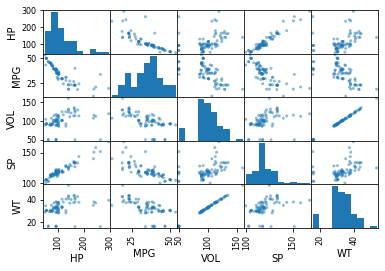

In [39]:
pd.plotting.scatter_matrix(df)
plt.show

# Cook’s Distance

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = m_vol_new.get_influence()
(c, _) = model_influence.cooks_distance

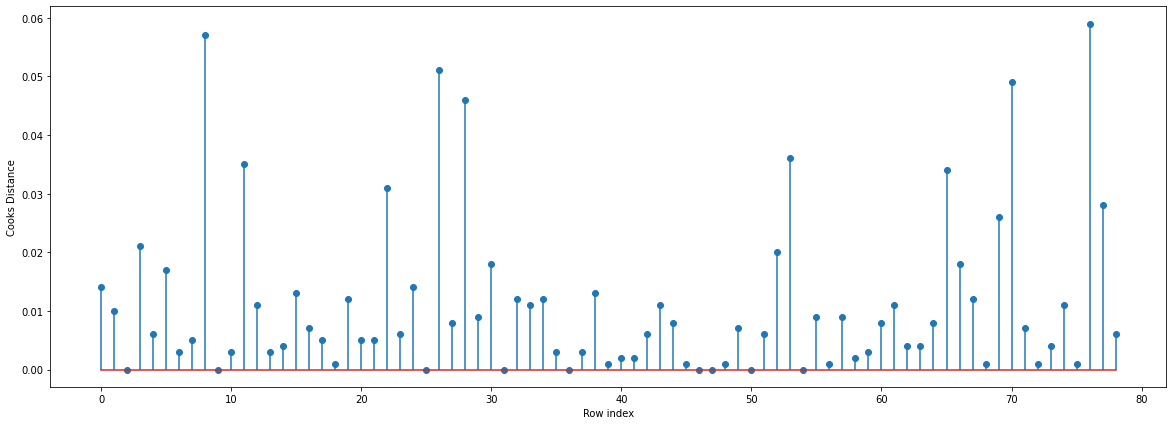

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Influence Points

In [42]:
# 3*(k+1)/n
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.22784810126582278

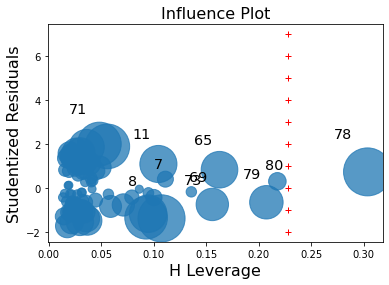

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(m_vol_new,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [46]:
df[df.index.isin([70, 76])]


,HP,MPG,VOL,SP,WT


## Predicting for new data